In [36]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


***Иерархическая кластеризация***

Иерархическая кластеризация — это метод обучения «без учителя» для кластеризации точек данных. Алгоритм строит кластеры путем измерения различий между данными. Обучение без учителя означает, что модель не нужно обучать, и нам не нужна «целевая» переменная. Этот метод можно использовать для любых данных для визуализации и интерпретации взаимосвязи между отдельными точками данных.
Здесь мы будем использовать иерархическую кластеризацию для группировки точек данных и визуализации кластеров с помощью дендрограммы и точечной диаграммы.
Как это работает?
Мы будем использовать агломеративную кластеризацию, тип иерархической кластеризации, которая следует восходящему подходу. Начнем с того, что рассмотрим каждую точку данных как отдельный кластер. Затем мы объединяем кластеры, которые имеют кратчайшее расстояние между ними, чтобы создать более крупные кластеры. Этот шаг повторяется до тех пор, пока не будет сформирован один большой кластер, содержащий все точки данных.
Иерархическая кластеризация требует от нас выбора метода как расстояния, так и связи. Мы будем использовать евклидово расстояние и метод связи Уорда, который пытается свести к минимуму дисперсию между кластерами.


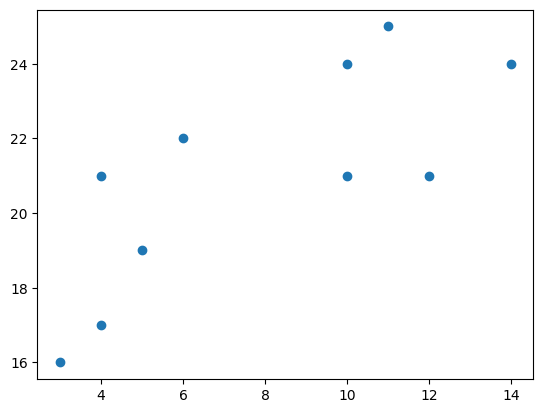

In [37]:
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()

Далее вычисляем связь между элементами используя euclidean distance, визуализацию разбивки выборки на кластеры, используя разметку элементов разными цветами и визуализацию дендрограммы:

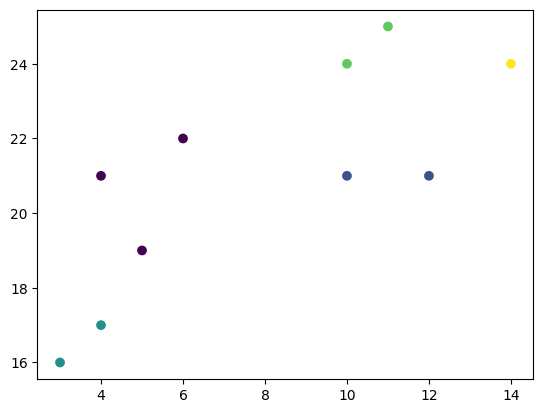

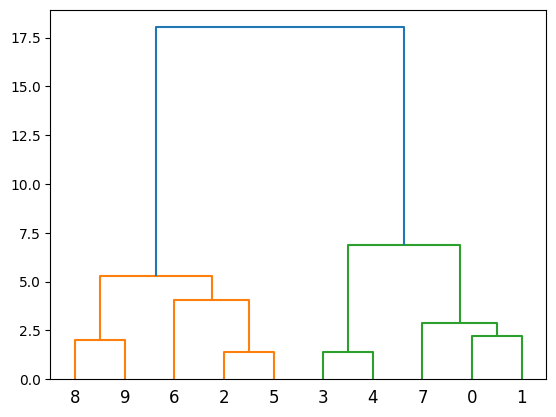

In [38]:
data = list(zip(x, y))

hierarchical_cluster = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)

plt.scatter(x, y, c=labels)
plt.show()

linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

Создать программу кластеризации методом иерархической кластеризации (на 5 кластеров), данных находящихся в файле «delaney-processed.csv» для полей  'Molecular Weight', 'measured log solubility in mols per litre'.
Вывести на экран нормализованные данные выборки, 
вывести визуализацию разбивки выборки на кластеры, используя разметку элементов разными цветами и 
визуализацию дендрограммы

In [39]:
df = pd.read_csv('/Users/tatianasalamatova/chemoinformatics/02/delaney-processed.csv')
new_data = df[['Molecular Weight', 'measured log solubility in mols per litre']]

scaler = StandardScaler()
normalized_new_data = scaler.fit_transform(new_data)

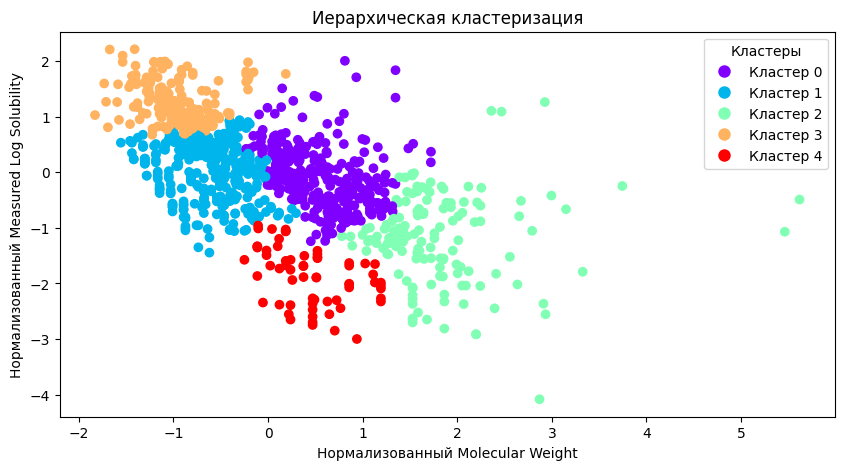

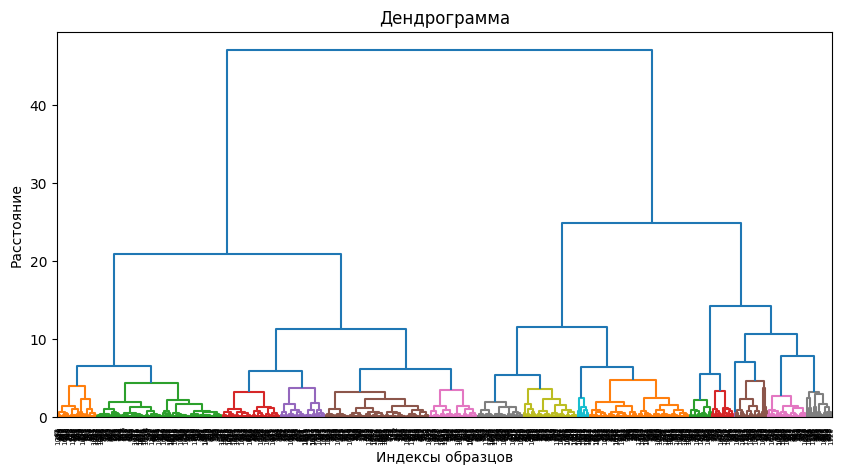

In [40]:
# Параметры кластеризации
n_clusters = 5  # количество кластеров
metric_use = 'euclidean'
method = 'ward'

# Выполнение агломеративной кластеризации
hierarchical_cluster = AgglomerativeClustering(n_clusters=n_clusters, metric=metric_use, linkage=method)
labels = hierarchical_cluster.fit_predict(normalized_new_data)

# Визуализация кластеров
plt.figure(figsize=(10, 5))
scatter = plt.scatter(normalized_new_data[:, 0], normalized_new_data[:, 1], c=labels, cmap='rainbow')

# Добавление легенды
legend_labels = [f'Кластер {i}' for i in range(n_clusters)]
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10) for i in range(n_clusters)]
plt.legend(handles, legend_labels, title='Кластеры')

plt.title('Иерархическая кластеризация')
plt.xlabel('Нормализованный Molecular Weight')
plt.ylabel('Нормализованный Measured Log Solubility')
plt.show()

# Построение дендрограммы
linkage_data = linkage(normalized_new_data, method=method, metric=metric_use)
plt.figure(figsize=(10, 5))
dendrogram(linkage_data, color_threshold=n_clusters)
plt.title('Дендрограмма')
plt.xlabel('Индексы образцов')
plt.ylabel('Расстояние')
plt.show()

Параметр linkage='ward' в иерархической кластеризации указывает на метод связывания, используемый для определения расстояния между кластерами. Метод Уорда (Ward's method) — это один из наиболее популярных методов агломеративной иерархической кластеризации.
Основные характеристики метода Уорда:
Минимизация дисперсии: Метод Уорда стремится минимизировать сумму квадратов расстояний внутри кластеров. При объединении двух кластеров он выбирает те, которые приводят к наименьшему увеличению общей дисперсии.
Расчет расстояния: Вместо того чтобы просто измерять расстояние между центрами кластеров, метод Уорда рассматривает, как объединение двух кластеров повлияет на общую дисперсию. Это делает его более чувствительным к форме и распределению данных.
Аналогия с ANOVA: Метод Уорда можно рассматривать как аналог анализа дисперсии (ANOVA), где цель состоит в том, чтобы минимизировать внутриклассовую дисперсию при объединении кластеров.
Сравнение с другими методами: В отличие от других методов связывания, таких как метод ближайшего соседа (single linkage) или метода полного соединения (complete linkage), метод Уорда обычно приводит к более компактным и хорошо разделенным кластерам.